In [1]:
import pandas as pd

# here we change the size of our plot figures
# uncomment this code after running cell [92]
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [10, 6]

In [4]:
# read ssb export data
df_ssb = pd.read_csv("../../datasets/kontali/ssb_export.csv",
                     encoding="latin-1",
                     delimiter=";",
                     index_col="ID"
                    )
df_ssb.tail()

,Vareflyt,År,Måned,Varenr,Landkode,Mengde,Verdi
ID,,,,,,,
409074,Eksport,2022,11,3054100,DK,1401,303852
409080,Eksport,2022,11,3054100,IE,513,127897
409097,Eksport,2022,11,3054100,GB,18,5199
409111,Eksport,2022,11,3054300,CA,37623,5777040
409112,Eksport,2022,11,3054300,DK,4,1855


In [6]:
# read product data
df_product = pd.read_csv("../../datasets/kontali/product.csv",
                         encoding="latin-1", 
                         delimiter=";", 
                         index_col="Product_Code",
                        )

# Here we merge the two dataframes into one and make two different dataframes that we can work with: df1 and df2
df_vis = df_ssb.merge(df_product, left_on="Varenr", right_on="Product_Code")[["År", "Måned", "Mengde", "Verdi", "Product_Description_KA"]]
# df1 shows yearly total export amount (Mengde) and value (Verdi) across all product categories
df1 = df_vis.groupby(["År"]).sum()[['Mengde','Verdi']]
# df2 shows yearly value (Verdi) for each product category
df2 = df_vis.groupby(["År", "Product_Description_KA"]).sum().Verdi.unstack()

In [7]:
# take a look at df1 (display the first five rows)

df1.head()

,Mengde,Verdi
År,,
2018,11470106,1100832860
2019,10074708,1069646046
2020,10020949,1061833111
2021,11429636,1160766177
2022,13850584,1657112303


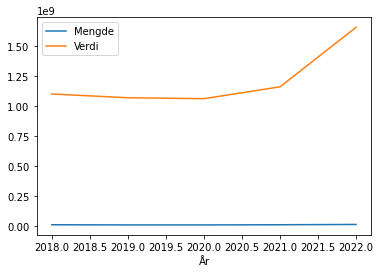

In [9]:
# plot df1

df1.plot();

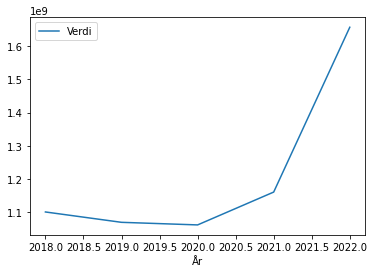

In [11]:
# plot df1 with y argument (Verdi)

df1.plot(y="Verdi");

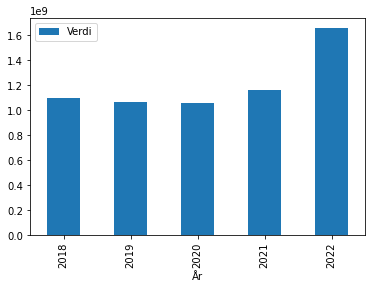

In [13]:
# change the plot to a barchart

df1.plot(y="Verdi", kind="bar");

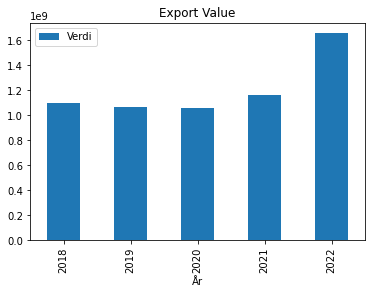

In [14]:
# give your plot a title: "Export Value"

df1.plot(y="Verdi", kind="bar", title="Export Value");

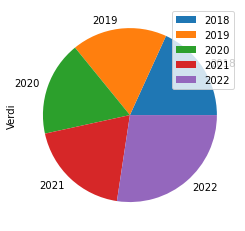

In [16]:
# make a pie chart of Verdi

df1.plot(y="Verdi", kind="pie");

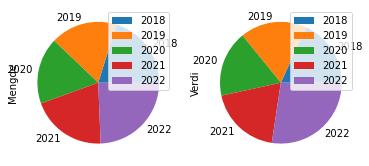

In [17]:
# make a pie chart of both Verdi and Mengde (hint: `subplots` argument)

df1.plot(kind="pie", subplots=True);

In [18]:
# take a look at df2 (display the last three rows)

df2.tail(3)

Product_Description_KA,Fresh Atlantic salmon (head on),Fresh salmon fillets,Fresh trout fillets,Frozen salmon fillets,Frozen trout fillets,Smoked Trout,Smoked salmon
År,,,,,,,
2020,37118085,431715979,2075847,417418893,63279645,101586692,8637970
2021,13313946,481314499,7231126,476237281,66946231,105378204,10344890
2022,39012253,693298134,7671455,722504151,74810415,111771500,8044395


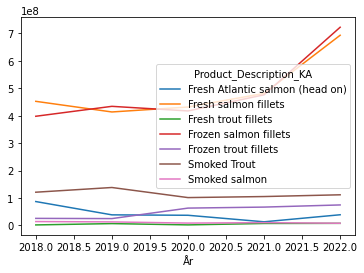

In [19]:
# plot df2

df2.plot();

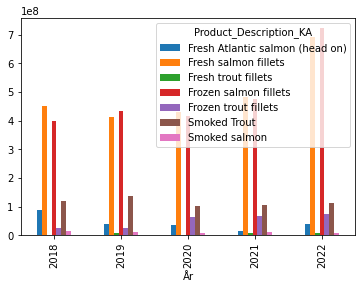

In [20]:
# plot df2 as a barchart

df2.plot(kind="bar");

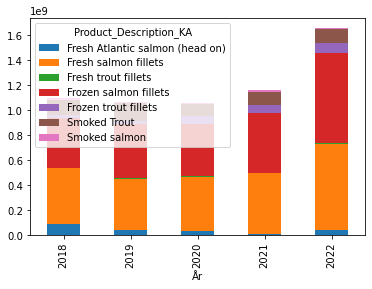

In [21]:
# stack the product categories on top of each other (`stacked` parameter)

df2.plot(kind="bar", stacked=True);

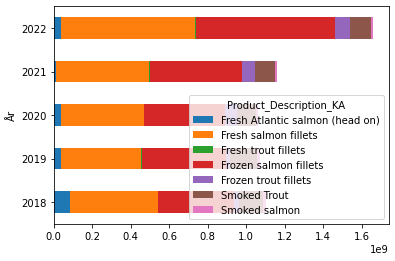

In [22]:
# now use a horizontal bar plot instead (`kind` argument)

df2.plot(kind="barh", stacked=True);

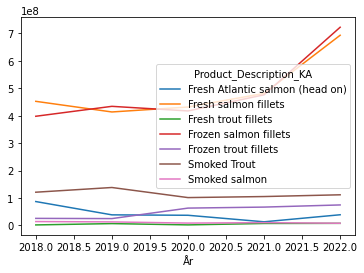

In [24]:
# something to keep in mind:

df2_sorted = df2.sort_index(ascending=False)
df2_sorted.head()

# plotting df2_sorted with still arrange the years in sequence, regardless of sequence in dataframe
df2_sorted.plot();